In [6]:
import os, sys, math
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

import pandas as pd

In [7]:
test = [
    (True,"weather is good!"),
    (True,"weather is great!"),
    (False,"what is the weather?"),
    (False,"what about the weather?")
]
test

[(True, 'weather is good!'),
 (True, 'weather is great!'),
 (False, 'what is the weather?'),
 (False, 'what about the weather?')]

In [8]:
from pygents.aigents_api import tokenize_re
from pygents.util import dictcount
from pygents.plot import plot_dict


In [9]:
all_dic = {}
cat_dic = {}
not_dic = {}

tokenized_text = []
for t in test:
    toks = tokenize_re(t[1])
    tokenized_text.append(toks)
    for tok in toks:
        dictcount(all_dic,tok)
        if t[0]:
            dictcount(cat_dic,tok)
        else:
            dictcount(not_dic,tok)
    
print(all_dic)
print(cat_dic)
print(not_dic)


{'weather': 4, 'is': 3, 'good': 1, '!': 2, 'great': 1, 'what': 2, 'the': 2, '?': 2, 'about': 1}
{'weather': 2, 'is': 2, 'good': 1, '!': 2, 'great': 1}
{'what': 2, 'is': 1, 'the': 2, 'weather': 2, '?': 2, 'about': 1}


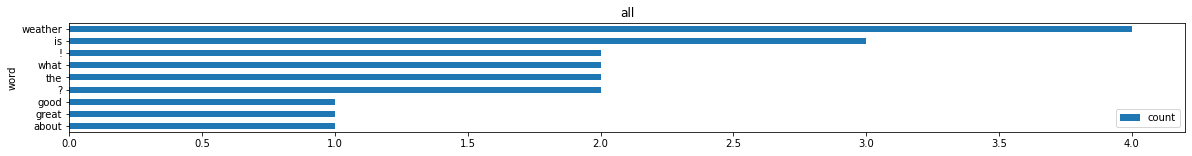

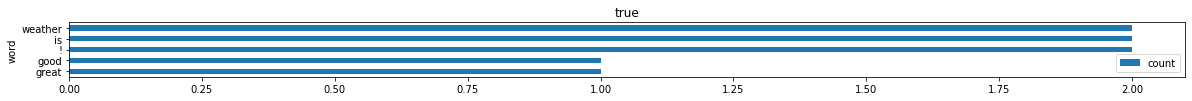

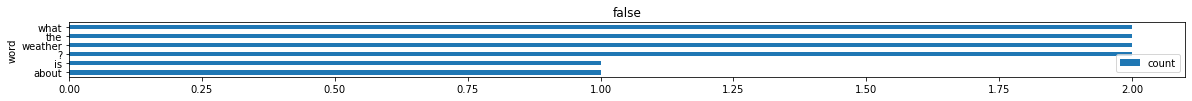

In [10]:
plot_dict(all_dic,"word","count","all")
plot_dict(cat_dic,"word","count","true")
plot_dict(not_dic,"word","count","false")
          

In [11]:
def dic2df(dic):
    df = pd.DataFrame([(key, dic[key]) for key in dic],columns=["word","count"])
    return df
                    

In [12]:
df_all = dic2df(all_dic)
df_all

,word,count
0,weather,4
1,is,3
2,good,1
3,!,2
4,great,1
5,what,2
6,the,2
7,?,2
8,about,1


In [13]:
df_cat = dic2df(cat_dic)
df_cat


,word,count
0,weather,2
1,is,2
2,good,1
3,!,2
4,great,1


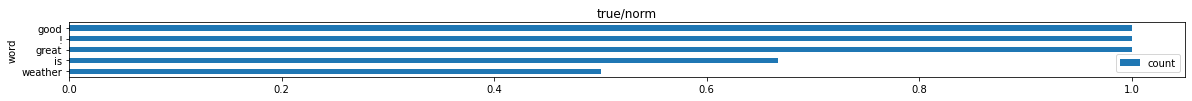

In [14]:
import math
def dicnormdf(dica,dicb,log=False):
    dicc = {}
    for a in dica:
        x = dica[a] / dicb[a]
        dicc[a] = math.log10(x) if log else x
    return dicc

plot_dict(dicnormdf(cat_dic,all_dic),"word","count","true/norm")

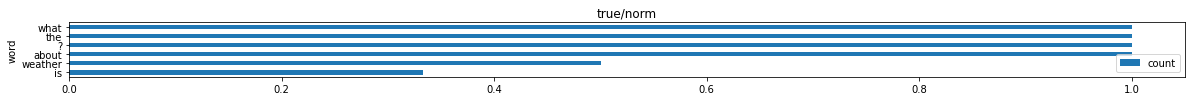

In [15]:
plot_dict(dicnormdf(not_dic,all_dic),"word","count","true/norm")

In [16]:
math.log10(0.001)

-3.0

In [17]:
dic_test = {}
dictcount(dic_test,'aaa')
dictcount(dic_test,'bbb')
dictcount(dic_test,'bbb')
dic_test

{'aaa': 1, 'bbb': 2}

In [18]:
dictcount(dic_test,('aaa'))
dictcount(dic_test,('bbb'))
dictcount(dic_test,('bbb'))
dic_test

{'aaa': 2, 'bbb': 4}

In [19]:
dictcount(dic_test,('aaa','bbb'))
dictcount(dic_test,('bbb','aaa'))
dictcount(dic_test,('bbb','aaa'))
dic_test

{'aaa': 2, 'bbb': 4, ('aaa', 'bbb'): 1, ('bbb', 'aaa'): 2}

In [20]:
dictcount(dic_test,['aaa','bbb'])
dictcount(dic_test,['bbb','aaa'])
dictcount(dic_test,['bbb','aaa'])
dic_test

{'aaa': 5, 'bbb': 7, ('aaa', 'bbb'): 1, ('bbb', 'aaa'): 2}

In [21]:
x = {}
x['a'] = 1
x[('a')]

1

## Agenda mining without of clusterting (yet) 
### Assuming features are topics
#### While clusters should be topics instead and clusters should be pased on topics 
(for instance, cluster "work day" should be based on features "work" and "on")

In [35]:
dated_test = [
    (1,["I work on a document","I work on a program"]),
    (2,["I work on a program","I work on a project"]),
    (3,["I work on a project","I work on a program"]),
    (4,["I work on a project","I work on a program"]),
    (5,["I work on a program","I work on a document"]),
    (6,["I ride a horse","I ride a horse"]),
    (7,["I ride a bicycle","I ride a bicycle"]),
    (8,["I work on a program","I work on a document"]),
    (9,["I work on a document","I work on a document"]),
    (10,["I work on a document","I work on a project"]),
    (11,["I work on a program","I work on a program"]),
    (12,["I work on a project","I work on a document"]),
    (13,["I ride a car","I ride a bicycle"]),
    (14,["I ride a horse","I ride a car"]),
]
dated_test

[(1, ['I work on a document', 'I work on a program']),
 (2, ['I work on a program', 'I work on a project']),
 (3, ['I work on a project', 'I work on a program']),
 (4, ['I work on a project', 'I work on a program']),
 (5, ['I work on a program', 'I work on a document']),
 (6, ['I ride a horse', 'I ride a horse']),
 (7, ['I ride a bicycle', 'I ride a bicycle']),
 (8, ['I work on a program', 'I work on a document']),
 (9, ['I work on a document', 'I work on a document']),
 (10, ['I work on a document', 'I work on a project']),
 (11, ['I work on a program', 'I work on a program']),
 (12, ['I work on a project', 'I work on a document']),
 (13, ['I ride a car', 'I ride a bicycle']),
 (14, ['I ride a horse', 'I ride a car'])]

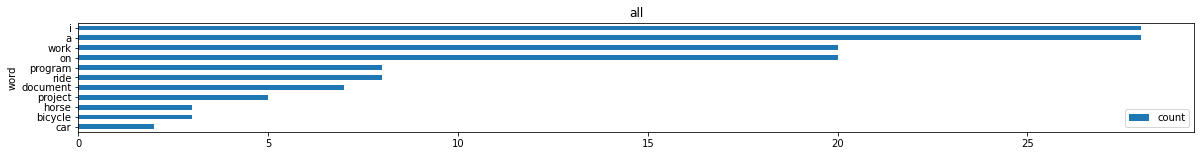

In [36]:
all_dic = {}

def count_all(test):
    for t in test:
        for text in t[1]:
            toks = tokenize_re(text)
            for tok in toks:
                dictcount(all_dic,tok)
            
count_all(dated_test)  
plot_dict(all_dic,"word","count","all")

In [37]:
def count_daily(test,threshold = 0):
    res_list = []
    for t in test:
        daily_dic = {}
        for text in t[1]:
            toks = tokenize_re(text)
            for tok in toks:
                dictcount(daily_dic,tok)
        d = {word: daily_dic[word] / all_dic[word] for word in daily_dic}
        d = {word: d[word] for word in d if d[word] > threshold}
        res_list.append((t[0],d))
    return res_list

count_daily(dated_test)

[(1,
  {'i': 0.07142857142857142,
   'work': 0.1,
   'on': 0.1,
   'a': 0.07142857142857142,
   'document': 0.14285714285714285,
   'program': 0.125}),
 (2,
  {'i': 0.07142857142857142,
   'work': 0.1,
   'on': 0.1,
   'a': 0.07142857142857142,
   'program': 0.125,
   'project': 0.2}),
 (3,
  {'i': 0.07142857142857142,
   'work': 0.1,
   'on': 0.1,
   'a': 0.07142857142857142,
   'project': 0.2,
   'program': 0.125}),
 (4,
  {'i': 0.07142857142857142,
   'work': 0.1,
   'on': 0.1,
   'a': 0.07142857142857142,
   'project': 0.2,
   'program': 0.125}),
 (5,
  {'i': 0.07142857142857142,
   'work': 0.1,
   'on': 0.1,
   'a': 0.07142857142857142,
   'program': 0.125,
   'document': 0.14285714285714285}),
 (6,
  {'i': 0.07142857142857142,
   'ride': 0.25,
   'a': 0.07142857142857142,
   'horse': 0.6666666666666666}),
 (7,
  {'i': 0.07142857142857142,
   'ride': 0.25,
   'a': 0.07142857142857142,
   'bicycle': 0.6666666666666666}),
 (8,
  {'i': 0.07142857142857142,
   'work': 0.1,
   'on': 0.

In [41]:
count_daily(dated_test,0.09)


[(1,
  {'work': 0.1, 'on': 0.1, 'document': 0.14285714285714285, 'program': 0.125}),
 (2, {'work': 0.1, 'on': 0.1, 'program': 0.125, 'project': 0.2}),
 (3, {'work': 0.1, 'on': 0.1, 'project': 0.2, 'program': 0.125}),
 (4, {'work': 0.1, 'on': 0.1, 'project': 0.2, 'program': 0.125}),
 (5,
  {'work': 0.1, 'on': 0.1, 'program': 0.125, 'document': 0.14285714285714285}),
 (6, {'ride': 0.25, 'horse': 0.6666666666666666}),
 (7, {'ride': 0.25, 'bicycle': 0.6666666666666666}),
 (8,
  {'work': 0.1, 'on': 0.1, 'program': 0.125, 'document': 0.14285714285714285}),
 (9, {'work': 0.1, 'on': 0.1, 'document': 0.2857142857142857}),
 (10,
  {'work': 0.1, 'on': 0.1, 'document': 0.14285714285714285, 'project': 0.2}),
 (11, {'work': 0.1, 'on': 0.1, 'program': 0.25}),
 (12,
  {'work': 0.1, 'on': 0.1, 'project': 0.2, 'document': 0.14285714285714285}),
 (13, {'ride': 0.25, 'car': 0.5, 'bicycle': 0.3333333333333333}),
 (14, {'ride': 0.25, 'horse': 0.3333333333333333, 'car': 0.5})]

In [42]:
count_daily(dated_test,0.1)

[(1, {'document': 0.14285714285714285, 'program': 0.125}),
 (2, {'program': 0.125, 'project': 0.2}),
 (3, {'project': 0.2, 'program': 0.125}),
 (4, {'project': 0.2, 'program': 0.125}),
 (5, {'program': 0.125, 'document': 0.14285714285714285}),
 (6, {'ride': 0.25, 'horse': 0.6666666666666666}),
 (7, {'ride': 0.25, 'bicycle': 0.6666666666666666}),
 (8, {'program': 0.125, 'document': 0.14285714285714285}),
 (9, {'document': 0.2857142857142857}),
 (10, {'document': 0.14285714285714285, 'project': 0.2}),
 (11, {'program': 0.25}),
 (12, {'project': 0.2, 'document': 0.14285714285714285}),
 (13, {'ride': 0.25, 'car': 0.5, 'bicycle': 0.3333333333333333}),
 (14, {'ride': 0.25, 'horse': 0.3333333333333333, 'car': 0.5})]

In [43]:
count_daily(dated_test,0.2)

[(1, {}),
 (2, {}),
 (3, {}),
 (4, {}),
 (5, {}),
 (6, {'ride': 0.25, 'horse': 0.6666666666666666}),
 (7, {'ride': 0.25, 'bicycle': 0.6666666666666666}),
 (8, {}),
 (9, {'document': 0.2857142857142857}),
 (10, {}),
 (11, {'program': 0.25}),
 (12, {}),
 (13, {'ride': 0.25, 'car': 0.5, 'bicycle': 0.3333333333333333}),
 (14, {'ride': 0.25, 'horse': 0.3333333333333333, 'car': 0.5})]

In [48]:
df = pd.DataFrame([(i[0],str(list(i[1]))) for i in count_daily(dated_test,0.1)], columns=['day', 'words'])
df

,day,words
0,1,"['document', 'program']"
1,2,"['program', 'project']"
2,3,"['project', 'program']"
3,4,"['project', 'program']"
4,5,"['program', 'document']"
5,6,"['ride', 'horse']"
6,7,"['ride', 'bicycle']"
7,8,"['program', 'document']"
8,9,['document']
9,10,"['document', 'project']"


In [51]:
daily_words = count_daily(dated_test,0.09)

daily_features = {}
for d in daily_words:
    for w in d[1]:
        dictcount(daily_features,w)

daily_features = {feature: daily_features[feature]/len(daily_words) for feature in daily_features}

daily_features

{'work': 0.7142857142857143,
 'on': 0.7142857142857143,
 'document': 0.42857142857142855,
 'program': 0.5,
 'project': 0.35714285714285715,
 'ride': 0.2857142857142857,
 'horse': 0.14285714285714285,
 'bicycle': 0.14285714285714285,
 'car': 0.14285714285714285}

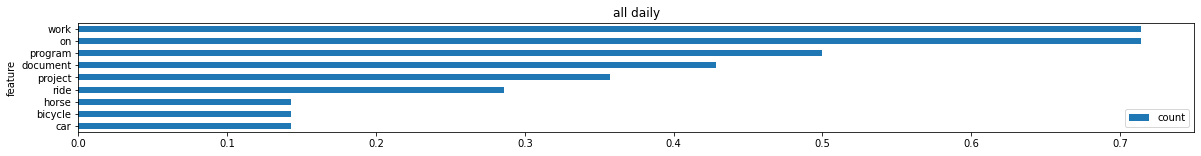

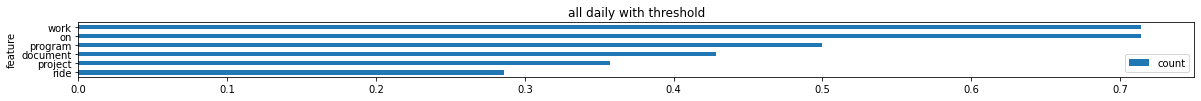

In [55]:
plot_dict(daily_features,
          "feature","count","all daily")

plot_dict({feature: daily_features[feature] for feature in daily_features if daily_features[feature] > 0.2},
          "feature","count","all daily with threshold")

In [56]:
feature_topics = sorted(list({feature: daily_features[feature] for feature in daily_features if daily_features[feature] > 0.2}))
feature_topics

['document', 'on', 'program', 'project', 'ride', 'work']

In [62]:
daily_topics = []
for d in daily_words:
    day_topics = [d[0]]
    for t in feature_topics:
        day_topics.append(d[1][t] if t in d[1] else 0)
    daily_topics.append(day_topics)

    
df = pd.DataFrame( daily_topics, columns=['day']+feature_topics )
df

,day,document,on,program,project,ride,work
0,1,0.142857,0.1,0.125,0.0,0.00,0.1
1,2,0.000000,0.1,0.125,0.2,0.00,0.1
2,3,0.000000,0.1,0.125,0.2,0.00,0.1
3,4,0.000000,0.1,0.125,0.2,0.00,0.1
4,5,0.142857,0.1,0.125,0.0,0.00,0.1
5,6,0.000000,0.0,0.000,0.0,0.25,0.0
6,7,0.000000,0.0,0.000,0.0,0.25,0.0
7,8,0.142857,0.1,0.125,0.0,0.00,0.1
8,9,0.285714,0.1,0.000,0.0,0.00,0.1
9,10,0.142857,0.1,0.000,0.2,0.00,0.1


<AxesSubplot:>

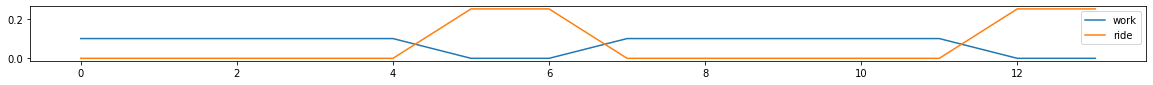

In [68]:
df[['work','ride']].plot()

# References
https://www.researchgate.net/publication/379458320_Analysis_of_TF-IDF_and_TF-RF_Feature_Extraction_on_Product_Review_Sentiment

https://arxiv.org/abs/2202.08965
http://webstructor.net/papers/Kolonin-HP-ACA-IC-text.pdf
http://webstructor.net/papers/Kolonin-HP-ACA-IC-present.pdf

https://ieeexplore.ieee.org/document/7361868
https://aigents.com/papers/Kolonin-Automatic-text-classification-and-property-extraction.pdf
https://aigents.com/papers/Kolonin-Automatic-text-classification-and-property-extraction-slides.pdf
